In [5]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import tensorflow as tf
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [14]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

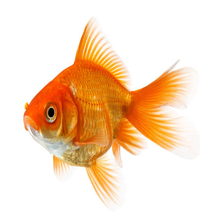

In [19]:
gold_fish = Image.open("/content/drive/MyDrive/Colab Notebooks/goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish


In [20]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [21]:
gold_fish

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [23]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [25]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [28]:
predicted_index = np.argmax(result)
predicted_index

2

In [29]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228827136/228813984 [==============================] - 3s 0us/step


In [30]:
data_dir

'./datasets/flower_photos'

In [32]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [36]:
list(data_dir.glob('roses*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/3179751458_9646d839f6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4910094611_8c7170fc95_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9369421752_db1ab2a6a4_m.jpg')]

In [37]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [39]:
roses = list(data_dir.glob('roses*/*.jpg'))

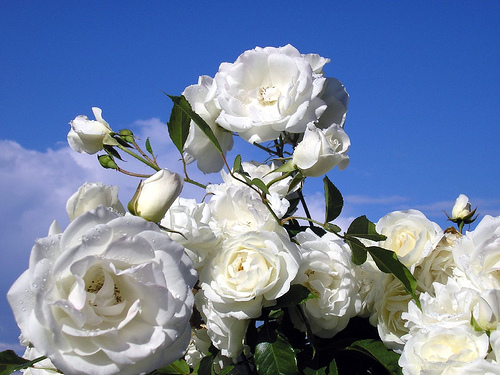

In [41]:
Image.open(str(roses[1]))

In [42]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [43]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [44]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3179751458_9646d839f6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4910094611_8c7170fc95_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9369421752_db1ab2a6a4_m.jpg')]

In [48]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(213, 320, 3)

In [49]:
cv2.resize(img,(224,224)).shape


(224, 224, 3)

In [50]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [51]:
X = np.array(X)
y = np.array(y)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [53]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [57]:
X_train_scaled.shape

(2752, 224, 224, 3)

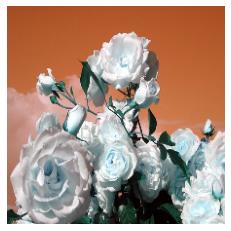

In [60]:
plt.axis('off')
plt.imshow(X[1])

In [61]:
y[1]

0

In [62]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [63]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

In [64]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 722, 722])

**pretrain images to imagenet**

In [67]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

top_layer = hub.KerasLayer(feature_extractor_model,input_shape=(224, 224, 3), trainable=False)

In [68]:
num_of_flowers = 5

model = tf.keras.Sequential([
  top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [70]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 12s 77ms/step - loss: 0.8024 - acc: 0.6922
Epoch 2/5
86/86 [==============================] - 7s 77ms/step - loss: 0.4273 - acc: 0.8579
Epoch 3/5
86/86 [==============================] - 7s 76ms/step - loss: 0.3365 - acc: 0.8903
Epoch 4/5
86/86 [==============================] - 7s 77ms/step - loss: 0.2851 - acc: 0.9081
Epoch 5/5
86/86 [==============================] - 7s 77ms/step - loss: 0.2461 - acc: 0.9226


In [71]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 3s 92ms/step - loss: 0.3182 - acc: 0.8813


[0.3182341754436493, 0.8812636137008667]